In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
preds = pd.read_pickle("001_oof_preds.pkl").values
train_df = pd.read_pickle("001_train_df.pkl")

In [4]:
train_df.head()

,bakaze,kyoku_num,honba,kyotaku,dora,parent,riichi_player,agari_hai,player0_tehai,player0_sutehai,...,can_see_count_27,can_see_count_28,can_see_count_29,can_see_count_31,can_see_count_32,can_see_count_33,can_see_count_34,can_see_count_35,can_see_count_36,can_see_count_37
0,0,1,0,0,[3],0,0,[2],"[0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, ...","[29, 19, 9, 37, 28, 26, 22, 34, 14]",...,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0
1,0,1,1,1,[1],0,2,"[16, 19]","[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[11, 28, 1, 35, 25, 8, 28, 33, 35, 18, 33, 5]",...,0.0,2.0,0.0,0.0,2.0,5.0,3.0,5.0,2.0,2.0
2,0,1,2,0,[5],0,3,"[6, 9]","[0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, ...","[37, 2, 14, 2, 7]",...,0.0,0.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,1.0
3,0,2,0,0,[1],1,1,[26],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[19, 18, 16, 19, 12, 8]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4,1,0,[5],3,0,"[21, 34]","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...","[36, 1, 35, 11, 26, 33, 24, 18, 7, 1, 26, 37, 22]",...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0


In [5]:
sutehai_srs = train_df["player0_sutehai"]

In [6]:
preds

array([[9.31327387e-02, 1.05345370e-01, 1.00331708e-01, ...,
        3.81457616e-03, 3.55370906e-03, 4.72686326e-05],
       [3.58206387e-03, 3.31057905e-02, 1.07449636e-01, ...,
        8.95733423e-05, 5.01821146e-03, 5.88814120e-03],
       [2.10331839e-02, 1.13533491e-03, 6.14134619e-02, ...,
        3.26416617e-02, 3.00056557e-02, 9.12996537e-05],
       ...,
       [5.36493605e-02, 6.38076036e-02, 7.02833525e-02, ...,
        5.67483921e-05, 2.21673803e-02, 4.12334090e-03],
       [2.55343057e-03, 6.57245610e-02, 8.91236600e-02, ...,
        3.32598543e-05, 2.92894017e-02, 4.50528498e-02],
       [5.85704094e-02, 7.37177097e-02, 9.52020278e-02, ...,
        1.72384378e-02, 1.21723406e-04, 1.98911710e-02]])

In [7]:
def get_hai_path(h):
    img_dir_path = Path("../hai-images/")
    if h < 10:
        f_str = f"man{h}"
    elif h < 20:
        f_str = f"pin{h%10}"
    elif h < 30:
        f_str = f"sou{h%10}"
    else:
        if h == 35:
            h = 36
        elif h == 36:
            h = 35
        f_str = f"ji{h%10}"
    filepath = str(img_dir_path / f"{f_str}-66-90-s.png")
    return filepath

In [8]:
def show_hai_images(hai_list):
    images = [Image.open(get_hai_path(h)) for h in hai_list]    
    for i, image in enumerate(images):
        ax = plt.subplot(4, 6, i+1)
        ax.imshow(image)
        ax.axis("off")
    plt.show()

In [9]:
def show_pred_img(pred_arr):
    all_hai_list = list(range(1, 10)) + list(range(11, 20)) + list(range(21, 30)) + list(range(31, 38))
    images = [Image.open(get_hai_path(h)) for h in all_hai_list]
    fig = plt.figure(figsize =(8, 8))
    for i, image in enumerate(images):
        #ax = plt.subplot(4, 9, i+1)
        ax = fig.add_subplot(4, 9, i+1)
        fig.subplots_adjust(top = 0.5, hspace = 0.5)
        ax.imshow(image)
        ax.set_title(str(round(pred_arr[i],4)), y=-0.5)
        ax.axis("off")

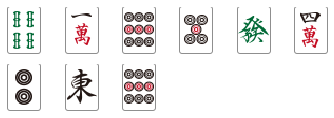

In [29]:
show_hai_images(sutehai_srs.iloc[15])

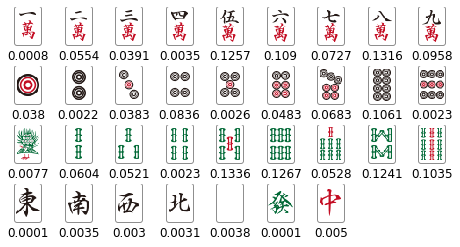

In [30]:
show_pred_img(preds[15])